In [7]:
print('Лабораторная работа 3')

Лабораторная работа 3


In [8]:
import pandas as pd

file_path = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')

df = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')

df.head()



,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


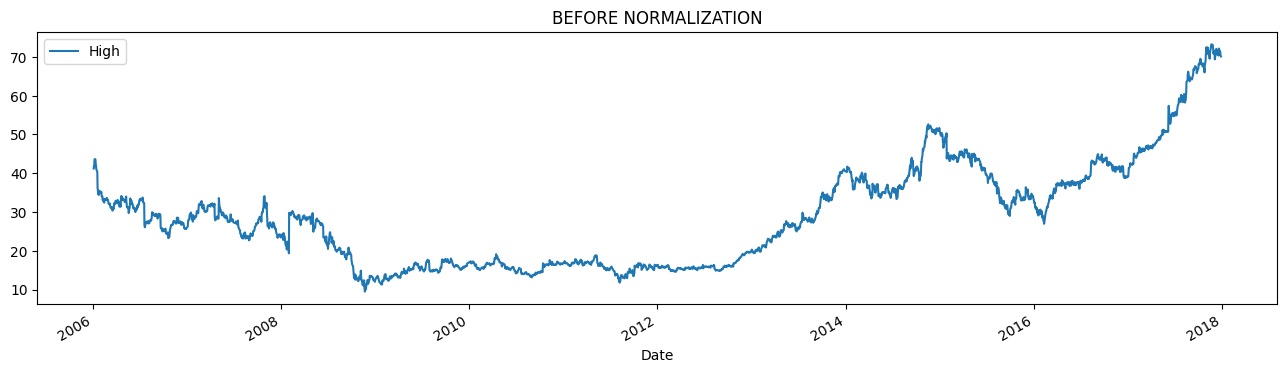

In [9]:
import matplotlib.pyplot as plt

df = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df.head()


#Visualizing data using specific columns
#Using 'High' column in this example
df['High'].plot(figsize=(16,4),legend=True)

plt.title('BEFORE NORMALIZATION')

plt.show()


In [ ]:
df_numeric = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [10]:
df=df.drop("Name", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 141.5 KB


In [11]:
import numpy as np

# Checking for missing values
training_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values
np.size(training_set)

2768

In [ ]:
mode_value = training_set.mode().iloc[0, 0]  
training_set.fillna(mode_value, inplace=True)  

            Open      High       Low     Close    Volume
Open    1.000000  0.999706  0.999579  0.999322 -0.176070
High    0.999706  1.000000  0.999519  0.999665 -0.170138
Low     0.999579  0.999519  1.000000  0.999717 -0.186537
Close   0.999322  0.999665  0.999717  1.000000 -0.179365
Volume -0.176070 -0.170138 -0.186537 -0.179365  1.000000


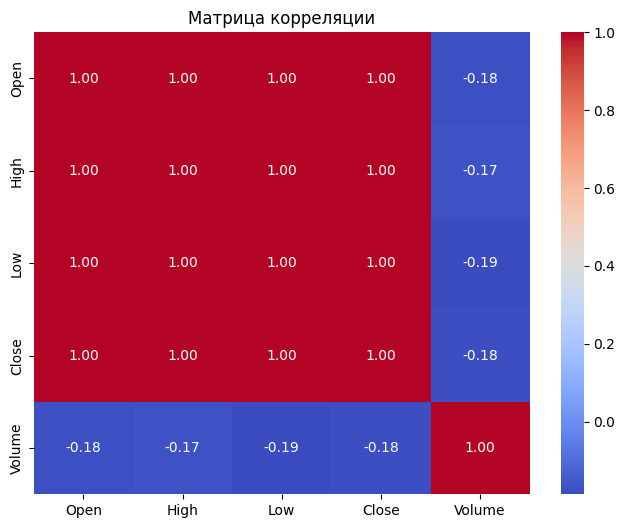

In [14]:

import pandas as pd
import seaborn as sns
file_path = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')

df = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')

df['Date'] = pd.to_datetime(df['Date'])

correlation_matrix = df_numeric.corr()

# Вывод матрицы
print(correlation_matrix)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()


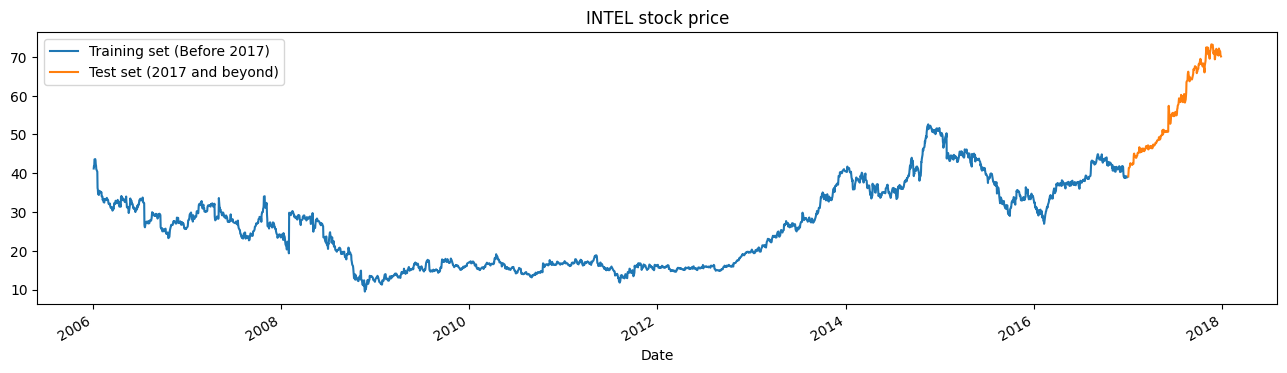

In [6]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
df["High"][:'2016'].plot(figsize=(16,4),legend=True)
df["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('INTEL stock price')
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
print(y_train)

[0.54126101 0.53662494 0.53430691 ... 0.6893834  0.6826611  0.68428373]


In [10]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout



# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=20,batch_size=32)



c:\Users\assas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0305
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0035
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0038
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0033
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0029
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0029
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0026
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0027
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0026
Epoch 10/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0024
Epoch 11/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0025
Epoch 12/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0023
Epoch 13/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0021
Epoch 14/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0022
Epoch 15/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0021
Epo

In [12]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [13]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


In [14]:
# Some functions to help out with
from sklearn.metrics import mean_absolute_percentage_error

def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real INTEL Stock Price')
    plt.plot(predicted, color='blue',label='Predicted INTEL Stock Price')
    plt.title('INTEL Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('INTEL Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_absolute_percentage_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

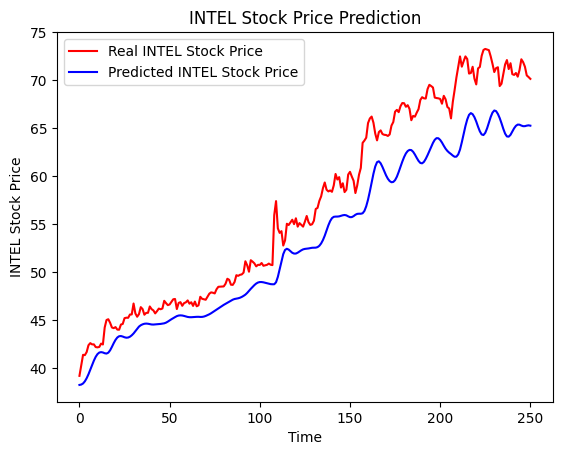

In [15]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [16]:
import math
from sklearn.metrics import mean_squared_error

# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 0.2459191533397314.


In [17]:

df = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')

df.head()


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [18]:
from scipy import stats

# Преобразование данных x с помощью преобразования Бокса-Кокса
xt, _  = stats.boxcox(df['High'])

In [19]:

np.diff(xt)
dataset_total_diff0 = df['High'].diff().dropna().reset_index(drop = True)
dataset_total_diff = df['High'].diff().dropna().reset_index(drop = True)
dataset_total_diff1 = dataset_total_diff.diff().dropna().reset_index(drop = True)
dataset_total_diff2 = dataset_total_diff1.diff().dropna().reset_index(drop = True)

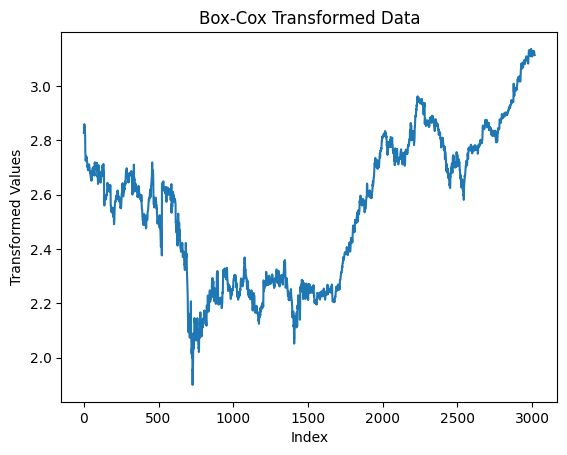

In [20]:
# Построение графика преобразованных данных
plt.plot(xt)
plt.xlabel('Index')
plt.ylabel('Transformed Values')
plt.title('Box-Cox Transformed Data')
plt.show()

<Axes: >

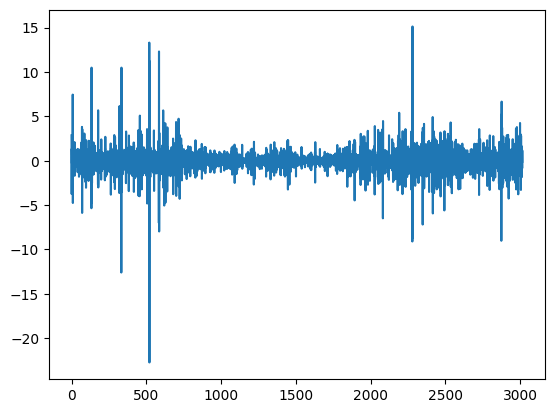

In [21]:
dataset_total_diff2.plot()

In [22]:
dataset_total_diff2

0       2.86
1      -3.76
2       1.34
3      -0.30
4       1.42
        ... 
3011   -1.85
3012    1.24
3013   -0.24
3014    1.15
3015   -0.75
Name: High, Length: 3016, dtype: float64

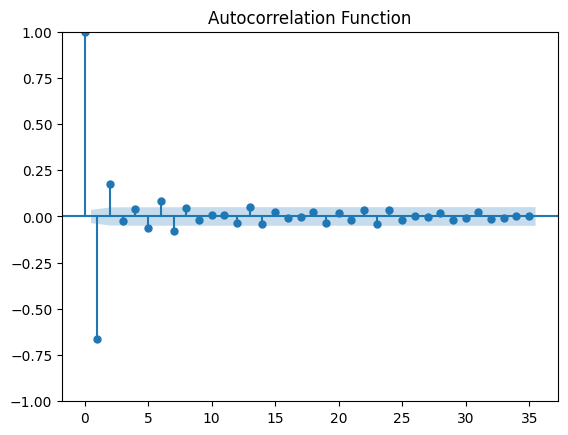

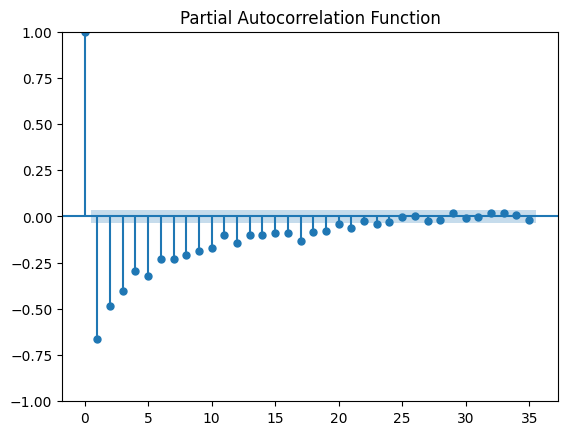

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dataset_total_diff2)
plt.title('Autocorrelation Function')
plt.show()

# Построение графика частичной автокорреляции
plot_pacf(dataset_total_diff2)
plt.title('Partial Autocorrelation Function')
plt.show()

In [24]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(training_set, start_p=1, start_q=1,
                              max_p=3, max_q=3, m=12,
                              start_P=0, seasonal=True,
                              d=1, D=1, trace=True,  #доп инфа
                              error_action='ignore',  #
                              suppress_warnings=True, #предупр подавл
                              stepwise=True) #пошаг мет доб и уд элем
#    p: Это порядок авторегрессии, который указывает на количество предыдущих значений временного ряда, используемых для прогнозирования следующего значения.
#    q: Это порядок скользящего среднего, который указывает на количество предыдущих ошибок прогнозирования, используемых для прогнозирования следующего значения.
# m период сезонности
# start P определяет минимальное значение порядка авторегрессии, с которого начнется поиск наилучшей модели
#    d: Это порядок разности для несезонной компоненты модели, который указывает, сколько раз нам нужно применить операцию разности к временному ряду, чтобы сделать его стационарным. Стационарный временной ряд обладает постоянным средним и дисперсией на протяжении времени.
#  D: Это порядок сезонной разности, который указывает, сколько раз мы должны применить операцию разности к сезонной составляющей временного ряда, чтобы сделать его стационарным на сезонных периодах.
#
#
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6810.096, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5955.933, Time=0.82 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.96 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6812.087, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5637.173, Time=1.64 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5635.176, Time=1.78 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5953.993, Time=0.64 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5637.173, Time=1.64 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5639.173, Time=1.84 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5637.1

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(training_set, order = (0, 1, 0), seasonal_order = (2, 1, 0, 12)) #Это порядок несезонной компоненты модели ARIMA.    Это порядок сезонной компоненты модели ARIMA.
model_fit = model.fit()
print(model_fit.summary())


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                 2768
Model:             ARIMA(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2814.588
Date:                          Wed, 18 Sep 2024   AIC                           5635.176
Time:                                  00:30:20   BIC                           5652.940
Sample:                                       0   HQIC                          5641.593
                                         - 2768                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6947      0.008    -91.030      0.000      -0.710      -0.680
ar.S.L24      -0.3342      0.008    -41.980      0.

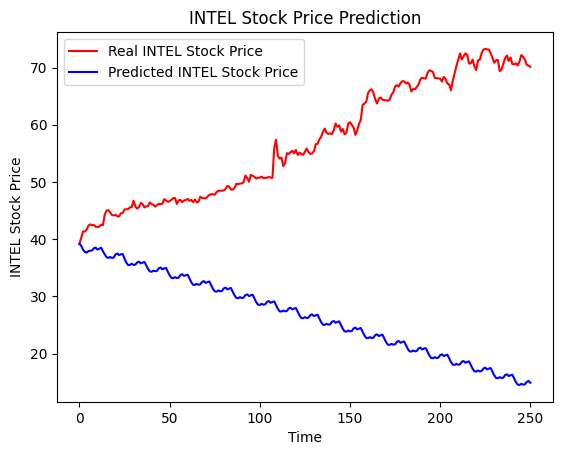

In [26]:
forecast = model_fit.forecast(steps = len(test_set))
plot_predictions(test_set,forecast)

In [27]:
return_rmse(test_set,forecast)

The root mean squared error is 0.7021188754758769.
